In [1]:
import pandas as pd
import numpy as np
import util
import preprocessing
import importlib
import string
import re
import nlp_util
##java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000

NLP_Task ready to use.


In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
# load files
tr_file, va_file, te_file = util.load_files()
tr_dict = util.tsv_to_dict(tsv_file=tr_file)
va_dict = util.tsv_to_dict(tsv_file=va_file)

In [4]:
## Data without punctuation and uppercases
tr_data_no_punct_upper = preprocessing.clean_text(sentences=tr_dict['statement'], remove_punctuation=True, lower_case= True)
va_data_no_punct_upper = preprocessing.clean_text(sentences=va_dict['statement'], remove_punctuation=True, lower_case= True)

In [6]:
#tr_data_no_punct_upper = preprocessing.clean_text(liwc_data.iloc[:,2].values, remove_punctuation=True, lower_case= True)

In [447]:
#tr_data_no_punct_upper
#file = open('testfile.txt','w') 
#for text in tr_data_no_punct_upper:
#    file.write(text) 
#    file.write('\n')
#file.close()
#liwc_data = pd.read_csv('..\\dataset\\train_liwc.csv')
#sentiment_data = pd.read_csv('testfile+results.csv')

In [462]:
false_pos = sentiment_data.iloc[:,1].values[[i for i,x in enumerate(labels) if x=='false']]
half_true_pos = sentiment_data.iloc[:,1].values[[i for i,x in enumerate(labels) if x=='half-true']]
mostly_true_pos = sentiment_data.iloc[:,1].values[[i for i,x in enumerate(labels) if x=='mostly-true']]
true_pos = sentiment_data.iloc[:,1].values[[i for i,x in enumerate(labels) if x=='true']]
barely_true_pos = sentiment_data.iloc[:,1].values[[i for i,x in enumerate(labels) if x=='barely-true']]
pans_fire_pos = sentiment_data.iloc[:,1].values[[i for i,x in enumerate(labels) if x=='pants-fire']]

In [463]:
false_neg = sentiment_data.iloc[:,2].values[[i for i,x in enumerate(labels) if x=='false']]
half_true_neg = sentiment_data.iloc[:,2].values[[i for i,x in enumerate(labels) if x=='half-true']]
mostly_true_neg = sentiment_data.iloc[:,2].values[[i for i,x in enumerate(labels) if x=='mostly-true']]
true_neg = sentiment_data.iloc[:,2].values[[i for i,x in enumerate(labels) if x=='true']]
barely_true_neg = sentiment_data.iloc[:,2].values[[i for i,x in enumerate(labels) if x=='barely-true']]
pans_fire_neg = sentiment_data.iloc[:,2].values[[i for i,x in enumerate(labels) if x=='pants-fire']]

In [514]:
false_stats = np.array([len(false_pos[(false_pos==1)]),len(false_pos[(false_pos==2)]),len(false_pos[(false_pos==3)]),len(false_pos[(false_pos==4)]),len(false_pos[(false_pos==5)])])
true_stats = np.array([len(true_pos[(true_pos==1)]),len(true_pos[(true_pos==2)]),len(true_pos[(true_pos==3)]),len(true_pos[(true_pos==4)]),len(true_pos[(true_pos==5)])])
half_true_stats = np.array([len(half_true_pos[(half_true_pos==1)]),len(half_true_pos[(half_true_pos==2)]),len(half_true_pos[(half_true_pos==3)]),len(half_true_pos[(half_true_pos==4)]),len(half_true_pos[(half_true_pos==5)])])
mostly_true_stats = np.array([len(mostly_true_pos[(mostly_true_pos==1)]),len(mostly_true_pos[(mostly_true_pos==2)]),len(mostly_true_pos[(mostly_true_pos==3)]),len(mostly_true_pos[(mostly_true_pos==4)]),len(mostly_true_pos[(mostly_true_pos==5)])])
barely_true_stats = np.array([len(barely_true_pos[(barely_true_pos==1)]),len(barely_true_pos[(barely_true_pos==2)]),len(barely_true_pos[(barely_true_pos==3)]),len(barely_true_pos[(barely_true_pos==4)]),len(barely_true_pos[(barely_true_pos==5)])])
pans_fire_stats = np.array([len(pans_fire_pos[(pans_fire_pos==1)]),len(pans_fire_pos[(pans_fire_pos==2)]),len(pans_fire_pos[(pans_fire_pos==3)]),len(pans_fire_pos[(pans_fire_pos==4)]),len(pans_fire_pos[(pans_fire_pos==5)])])

In [515]:
false_stats_neg = np.array([len(false_neg[(false_neg==-1)]),len(false_neg[(false_neg==-2)]),len(false_neg[(false_neg==-3)]),len(false_neg[(false_neg==-4)]),len(false_neg[(false_neg==-5)])])
true_stats_neg = np.array([len(true_neg[(true_neg==-1)]),len(true_neg[(true_neg==-2)]),len(true_neg[(true_neg==-3)]),len(true_neg[(true_neg==-4)]),len(true_neg[(true_neg==-5)])])
half_true_stats_neg = np.array([len(half_true_neg[(half_true_neg==-1)]),len(half_true_neg[(half_true_neg==-2)]),len(half_true_neg[(half_true_neg==-3)]),len(half_true_neg[(half_true_neg==-4)]),len(half_true_neg[(half_true_neg==-5)])])
mostly_true_stats_neg = np.array([len(mostly_true_neg[(mostly_true_neg==-1)]),len(mostly_true_neg[(mostly_true_neg==-2)]),len(mostly_true_neg[(mostly_true_neg==-3)]),len(mostly_true_neg[(mostly_true_neg==-4)]),len(mostly_true_neg[(mostly_true_neg==-5)])])
barely_true_stats_neg = np.array([len(barely_true_neg[(barely_true_neg==-1)]),len(barely_true_neg[(barely_true_neg==-2)]),len(barely_true_neg[(barely_true_neg==-3)]),len(barely_true_neg[(barely_true_neg==-4)]),len(barely_true_neg[(barely_true_neg==-5)])])
pans_fire_stats_neg = np.array([len(pans_fire_neg[(pans_fire_neg==-1)]),len(pans_fire_neg[(pans_fire_neg==-2)]),len(pans_fire_neg[(pans_fire_neg==-3)]),len(pans_fire_neg[(pans_fire_neg==-4)]),len(pans_fire_neg[(pans_fire_neg==-5)])])

In [472]:
import matplotlib.pyplot as plt

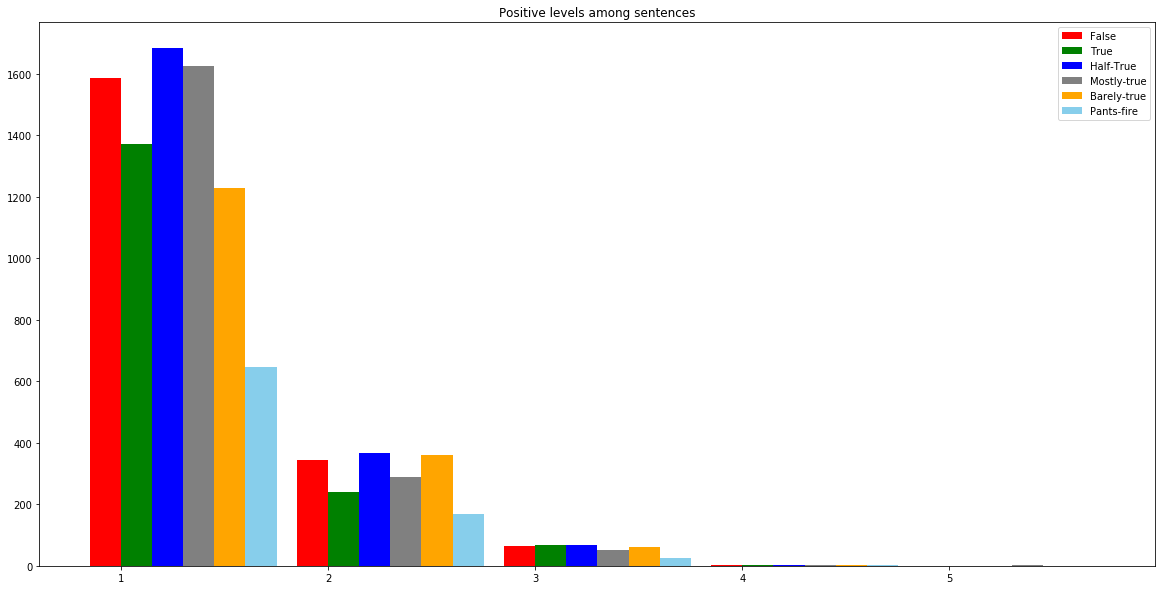

In [516]:
fig, ax = plt.subplots(figsize=(20,10))
ind = np.arange(5)    # the x locations for the groups
width = 0.15         # the width of the bars
p1 = ax.bar(ind, false_stats, width, color='r')
p2 = ax.bar(ind+width, true_stats, width, color='g')
p3 = ax.bar(ind+width*2, half_true_stats, width, color='b')
p4 = ax.bar(ind+width*3, mostly_true_stats, width, color='gray')
p5 = ax.bar(ind+width*4, barely_true_stats, width, color='orange')
p6 = ax.bar(ind+width*5, pans_fire_stats,width,color='skyblue')
ax.set_title('Positive levels among sentences')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5'))

ax.legend((p1[0], p2[0],p3[0],p4[0],p5[0],p6[0]), ('False', 'True', 'Half-True','Mostly-true','Barely-true','Pants-fire'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.show()

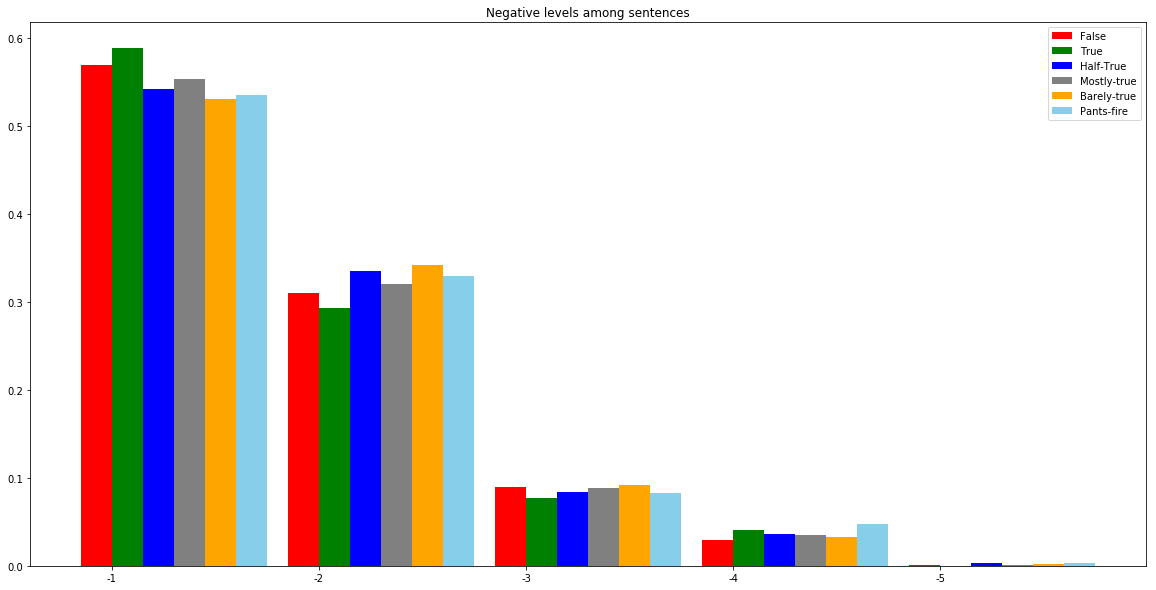

In [519]:

fig, ax = plt.subplots(figsize=(20,10))
ind = np.arange(5)    # the x locations for the groups
width = 0.15         # the width of the bars
p1 = ax.bar(ind, false_stats_neg/sum(false_stats_neg), width, color='r')
p2 = ax.bar(ind+width, true_stats_neg/sum(true_stats_neg), width, color='g')
p3 = ax.bar(ind+width*2, half_true_stats_neg/sum(half_true_stats_neg), width, color='b')
p4 = ax.bar(ind+width*3, mostly_true_stats_neg/sum(mostly_true_stats_neg), width, color='gray')
p5 = ax.bar(ind+width*4, barely_true_stats_neg/sum(barely_true_stats_neg), width, color='orange')
p6 = ax.bar(ind+width*5, pans_fire_stats_neg/sum(pans_fire_stats_neg),width,color='skyblue')
ax.set_title('Negative levels among sentences')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('-1', '-2', '-3', '-4', '-5'))

ax.legend((p1[0], p2[0],p3[0],p4[0],p5[0],p6[0]), ('False', 'True', 'Half-True','Mostly-true','Barely-true','Pants-fire'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.show()

In [455]:
sentiment_data.iloc[:,1].values

array([2, 1, 1, ..., 2, 1, 2], dtype=int64)

In [452]:
multi_labels_tr

array([1, 5, 6, ..., 5, 1, 3])

In [521]:
sentiment_features = np.zeros((len(multi_labels_tr),2))

In [523]:
sentiment_features = sentiment_features.T

In [525]:
sentiment_features[0] = sentiment_data.iloc[:,1].values
sentiment_features[1] = sentiment_data.iloc[:,2].values

In [526]:
sentiment_features = sentiment_features.T

In [527]:
sentiment_features = 

array([[ 2., -1.],
       [ 1., -2.],
       [ 1., -2.],
       ...,
       [ 2., -2.],
       [ 1., -1.],
       [ 2., -4.]])

In [528]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_features[[i for i,x in enumerate(binary_labels_tr) if x!=0]], binary_labels_tr[[i for i,x in enumerate(binary_labels_tr) if x!=0]], test_size=0.2, random_state=42)

In [531]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_features[[i for i,x in enumerate(binary_labels_tr) if x!=0]], binary_labels_tr[[i for i,x in enumerate(binary_labels_tr) if x!=0]], test_size=0.2, random_state=42)
for i in range(1,10):
    dclf = DecisionTreeClassifier(max_depth=i)
    dclf.fit(X_train,y_train)
    dclf_predictions = dclf.predict(X_test)
    print(classification_report(y_test, dclf_predictions))

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       725
          1       0.56      1.00      0.71       905

avg / total       0.31      0.56      0.40      1630

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       725
          1       0.56      1.00      0.71       905

avg / total       0.31      0.56      0.40      1630

             precision    recall  f1-score   support

         -1       0.62      0.01      0.03       725
          1       0.56      0.99      0.71       905

avg / total       0.59      0.56      0.41      1630

             precision    recall  f1-score   support

         -1       0.62      0.01      0.03       725
          1       0.56      0.99      0.71       905

avg / total       0.59      0.56      0.41      1630

             precision    recall  f1-score   support

         -1       0.62      0.01      0.03       725
          1       0.56      0.99 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# All Cap words, enquoted phrases, words in parenthesis

In [50]:
all_cap = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in liwc_data.iloc[:,2].values]]
enquoted_words = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in liwc_data.iloc[:,2].values] ]
parenthesis_words = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in liwc_data.iloc[:,2].values] ]

# Manually created features

In [304]:
manual_features = np.zeros((len(liwc_data),9))
manual_features = manual_features.T
features_names = ['all_cap','enquoted_words','parethesis_words','analytic_perc','clout_perc','authentic_perc','tone_perc','sixltr_perc'] 
manual_features[0] = all_cap 
manual_features[1] = enquoted_words
manual_features[2] = parenthesis_words
manual_features[3] = word_count_norm
manual_features[4] = analytic_perc
manual_features[5] = clout_perc
manual_features[6] = authentic_perc
manual_features[7] = tone_perc
manual_features[8] = sixltr_perc
manual_features = manual_features.T

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

# Normalizing features

In [423]:
from sklearn.preprocessing import scale

In [424]:
scaled_features = scale(liwc_features, axis=0)

# Dummy Classifier

In [425]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features[[i for i,x in enumerate(binary_labels_tr) if x!=0]], binary_labels_tr[[i for i,x in enumerate(binary_labels_tr) if x!=0]], test_size=0.2, random_state=42)

In [432]:
#for max_depth in range(1,10):
#print('Max Depth: ', max_depth)
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
clf.fit(X_new, y_train)
predicts=clf.predict(X_test)
print(accuracy_score(y_test,predicts))
print(classification_report(y_test, predicts))

ValueError: Number of features of the model must match the input. Model n_features is 48 and input n_features is 96 

In [427]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new.shape  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(6516, 48)

In [428]:
for i,x in enumerate(clf.feature_importances_):
    print(i, x, liwc_data.columns[i])

0 0.0 A
1 0.0 B
2 0.0 C
3 0.016419169313135768 WC
4 0.01634618058175735 Analytic
5 0.017370341473270795 Clout
6 0.021432053392764425 Authentic
7 0.012122472534330042 Tone
8 0.016512963426835885 WPS
9 0.01993146393308303 Sixltr
10 0.02045324811180354 Dic
11 0.01867389798690371 function
12 0.014168485205606256 pronoun
13 0.011787018333348389 ppron
14 0.00606403567129038 i
15 0.007924529772072803 we
16 0.004493524430556781 you
17 0.006717337852972908 shehe
18 0.007125931712835839 they
19 0.012450232095030456 ipron
20 0.019361921638449398 article
21 0.01889405191746397 prep
22 0.01737647689107642 auxverb
23 0.014002500033625506 adverb
24 0.014501038483904272 conj
25 0.009890182927153645 negate
26 0.018607147249540365 verb
27 0.01770343944814575 adj
28 0.016510148341842078 compare
29 0.008029431988339795 interrog
30 0.02334470089003184 number
31 0.018750876578523916 quant
32 0.01289877588841036 affect
33 0.010795923759981613 posemo
34 0.009520858721857135 negemo
35 0.002698093779548325 anx


In [386]:
dclf = DummyClassifier(strategy='most_frequent', random_state=42)
dclf.fit(X_train, y_train)
predicts=dclf.predict(X_test)
print(accuracy_score(y_test,predicts))
print(classification_report(y_test, predicts))

0.5552147239263804
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       725
          1       0.56      1.00      0.71       905

avg / total       0.31      0.56      0.40      1630



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Text Blob

In [21]:
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
import gc

In [8]:
text = tr_data_no_punct_upper[0]
blob_sentiment_analyzer = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob_sentiment_analyzer.sentiment

Sentiment(classification='pos', p_pos=0.9874712766600272, p_neg=0.012528723339973812)

In [91]:
text

'says the annies list political group supports third trimester abortions on demand'

In [10]:
extractor = ConllExtractor()
noun_phrase_extractor = TextBlob(text, np_extractor=extractor)
noun_phrase_extractor.noun_phrases

WordList(['annies list political group', 'third trimester abortions'])

In [553]:
blob = TextBlob(text)
print(blob.polarity)
print(blob.subjectivity)

0.0
0.05


In [22]:
blob_sentiment_analyzer = Blobber(analyzer=NaiveBayesAnalyzer())

In [24]:
blob_sentiment_analyzer(text).sentiment

Sentiment(classification='pos', p_pos=0.9874712766600272, p_neg=0.012528723339973812)

In [83]:
text_blob_features = np.zeros((len(tr_data_no_punct_upper),4))

In [85]:
text_blob_features = np.zeros((len(tr_data_no_punct_upper),4))
blob_sentiment_analyzer = Blobber(analyzer=NaiveBayesAnalyzer())
for i,each_text in enumerate(tr_data_no_punct_upper):
    print('analyzing: ',i)
    #blob_sentiment_analyzer = TextBlob(each_text, analyzer=NaiveBayesAnalyzer())
    text_blob_features[i,0]=blob_sentiment_analyzer(each_text).sentiment[1]
    text_blob_features[i,1]=blob_sentiment_analyzer(each_text).sentiment[2]
    #text_blob_features[i,2]= TextBlob(each_text).polarity
    text_blob_features[i,2]= TextBlob(each_text).subjectivity
    noun_phrase_extractor = TextBlob(each_text, np_extractor=extractor)
    text_blob_features[i,3]= len(noun_phrase_extractor.noun_phrases)
    
    

analyzing:  0
analyzing:  1
analyzing:  2
analyzing:  3
analyzing:  4
analyzing:  5
analyzing:  6
analyzing:  7
analyzing:  8
analyzing:  9
analyzing:  10
analyzing:  11
analyzing:  12
analyzing:  13
analyzing:  14
analyzing:  15
analyzing:  16
analyzing:  17
analyzing:  18
analyzing:  19
analyzing:  20
analyzing:  21
analyzing:  22
analyzing:  23
analyzing:  24
analyzing:  25
analyzing:  26
analyzing:  27
analyzing:  28
analyzing:  29
analyzing:  30
analyzing:  31
analyzing:  32
analyzing:  33
analyzing:  34
analyzing:  35
analyzing:  36
analyzing:  37
analyzing:  38
analyzing:  39
analyzing:  40
analyzing:  41
analyzing:  42
analyzing:  43
analyzing:  44
analyzing:  45
analyzing:  46
analyzing:  47
analyzing:  48
analyzing:  49
analyzing:  50
analyzing:  51
analyzing:  52
analyzing:  53
analyzing:  54
analyzing:  55
analyzing:  56
analyzing:  57
analyzing:  58
analyzing:  59
analyzing:  60
analyzing:  61
analyzing:  62
analyzing:  63
analyzing:  64
analyzing:  65
analyzing:  66
analy

analyzing:  600
analyzing:  601
analyzing:  602
analyzing:  603
analyzing:  604
analyzing:  605
analyzing:  606
analyzing:  607
analyzing:  608
analyzing:  609
analyzing:  610
analyzing:  611
analyzing:  612
analyzing:  613
analyzing:  614
analyzing:  615
analyzing:  616
analyzing:  617
analyzing:  618
analyzing:  619
analyzing:  620
analyzing:  621
analyzing:  622
analyzing:  623
analyzing:  624
analyzing:  625
analyzing:  626
analyzing:  627
analyzing:  628
analyzing:  629
analyzing:  630
analyzing:  631
analyzing:  632
analyzing:  633
analyzing:  634
analyzing:  635
analyzing:  636
analyzing:  637
analyzing:  638
analyzing:  639
analyzing:  640
analyzing:  641
analyzing:  642
analyzing:  643
analyzing:  644
analyzing:  645
analyzing:  646
analyzing:  647
analyzing:  648
analyzing:  649
analyzing:  650
analyzing:  651
analyzing:  652
analyzing:  653
analyzing:  654
analyzing:  655
analyzing:  656
analyzing:  657
analyzing:  658
analyzing:  659
analyzing:  660
analyzing:  661
analyzin

analyzing:  1138
analyzing:  1139
analyzing:  1140
analyzing:  1141
analyzing:  1142
analyzing:  1143
analyzing:  1144
analyzing:  1145
analyzing:  1146
analyzing:  1147
analyzing:  1148
analyzing:  1149
analyzing:  1150
analyzing:  1151
analyzing:  1152
analyzing:  1153
analyzing:  1154
analyzing:  1155
analyzing:  1156
analyzing:  1157
analyzing:  1158
analyzing:  1159
analyzing:  1160
analyzing:  1161
analyzing:  1162
analyzing:  1163
analyzing:  1164
analyzing:  1165
analyzing:  1166
analyzing:  1167
analyzing:  1168
analyzing:  1169
analyzing:  1170
analyzing:  1171
analyzing:  1172
analyzing:  1173
analyzing:  1174
analyzing:  1175
analyzing:  1176
analyzing:  1177
analyzing:  1178
analyzing:  1179
analyzing:  1180
analyzing:  1181
analyzing:  1182
analyzing:  1183
analyzing:  1184
analyzing:  1185
analyzing:  1186
analyzing:  1187
analyzing:  1188
analyzing:  1189
analyzing:  1190
analyzing:  1191
analyzing:  1192
analyzing:  1193
analyzing:  1194
analyzing:  1195
analyzing:  11

analyzing:  1887
analyzing:  1888
analyzing:  1889
analyzing:  1890
analyzing:  1891
analyzing:  1892
analyzing:  1893
analyzing:  1894
analyzing:  1895
analyzing:  1896
analyzing:  1897
analyzing:  1898
analyzing:  1899
analyzing:  1900
analyzing:  1901
analyzing:  1902
analyzing:  1903
analyzing:  1904
analyzing:  1905
analyzing:  1906
analyzing:  1907
analyzing:  1908
analyzing:  1909
analyzing:  1910
analyzing:  1911
analyzing:  1912
analyzing:  1913
analyzing:  1914
analyzing:  1915
analyzing:  1916
analyzing:  1917
analyzing:  1918
analyzing:  1919
analyzing:  1920
analyzing:  1921
analyzing:  1922
analyzing:  1923
analyzing:  1924
analyzing:  1925
analyzing:  1926
analyzing:  1927
analyzing:  1928
analyzing:  1929
analyzing:  1930
analyzing:  1931
analyzing:  1932
analyzing:  1933
analyzing:  1934
analyzing:  1935
analyzing:  1936
analyzing:  1937
analyzing:  1938
analyzing:  1939
analyzing:  1940
analyzing:  1941
analyzing:  1942
analyzing:  1943
analyzing:  1944
analyzing:  19

analyzing:  2386
analyzing:  2387
analyzing:  2388
analyzing:  2389
analyzing:  2390
analyzing:  2391
analyzing:  2392
analyzing:  2393
analyzing:  2394
analyzing:  2395
analyzing:  2396
analyzing:  2397
analyzing:  2398
analyzing:  2399
analyzing:  2400
analyzing:  2401
analyzing:  2402
analyzing:  2403
analyzing:  2404
analyzing:  2405
analyzing:  2406
analyzing:  2407
analyzing:  2408
analyzing:  2409
analyzing:  2410
analyzing:  2411
analyzing:  2412
analyzing:  2413
analyzing:  2414
analyzing:  2415
analyzing:  2416
analyzing:  2417
analyzing:  2418
analyzing:  2419
analyzing:  2420
analyzing:  2421
analyzing:  2422
analyzing:  2423
analyzing:  2424
analyzing:  2425
analyzing:  2426
analyzing:  2427
analyzing:  2428
analyzing:  2429
analyzing:  2430
analyzing:  2431
analyzing:  2432
analyzing:  2433
analyzing:  2434
analyzing:  2435
analyzing:  2436
analyzing:  2437
analyzing:  2438
analyzing:  2439
analyzing:  2440
analyzing:  2441
analyzing:  2442
analyzing:  2443
analyzing:  24

analyzing:  2886
analyzing:  2887
analyzing:  2888
analyzing:  2889
analyzing:  2890
analyzing:  2891
analyzing:  2892
analyzing:  2893
analyzing:  2894
analyzing:  2895
analyzing:  2896
analyzing:  2897
analyzing:  2898
analyzing:  2899
analyzing:  2900
analyzing:  2901
analyzing:  2902
analyzing:  2903
analyzing:  2904
analyzing:  2905
analyzing:  2906
analyzing:  2907
analyzing:  2908
analyzing:  2909
analyzing:  2910
analyzing:  2911
analyzing:  2912
analyzing:  2913
analyzing:  2914
analyzing:  2915
analyzing:  2916
analyzing:  2917
analyzing:  2918
analyzing:  2919
analyzing:  2920
analyzing:  2921
analyzing:  2922
analyzing:  2923
analyzing:  2924
analyzing:  2925
analyzing:  2926
analyzing:  2927
analyzing:  2928
analyzing:  2929
analyzing:  2930
analyzing:  2931
analyzing:  2932
analyzing:  2933
analyzing:  2934
analyzing:  2935
analyzing:  2936
analyzing:  2937
analyzing:  2938
analyzing:  2939
analyzing:  2940
analyzing:  2941
analyzing:  2942
analyzing:  2943
analyzing:  29

analyzing:  3385
analyzing:  3386
analyzing:  3387
analyzing:  3388
analyzing:  3389
analyzing:  3390
analyzing:  3391
analyzing:  3392
analyzing:  3393
analyzing:  3394
analyzing:  3395
analyzing:  3396
analyzing:  3397
analyzing:  3398
analyzing:  3399
analyzing:  3400
analyzing:  3401
analyzing:  3402
analyzing:  3403
analyzing:  3404
analyzing:  3405
analyzing:  3406
analyzing:  3407
analyzing:  3408
analyzing:  3409
analyzing:  3410
analyzing:  3411
analyzing:  3412
analyzing:  3413
analyzing:  3414
analyzing:  3415
analyzing:  3416
analyzing:  3417
analyzing:  3418
analyzing:  3419
analyzing:  3420
analyzing:  3421
analyzing:  3422
analyzing:  3423
analyzing:  3424
analyzing:  3425
analyzing:  3426
analyzing:  3427
analyzing:  3428
analyzing:  3429
analyzing:  3430
analyzing:  3431
analyzing:  3432
analyzing:  3433
analyzing:  3434
analyzing:  3435
analyzing:  3436
analyzing:  3437
analyzing:  3438
analyzing:  3439
analyzing:  3440
analyzing:  3441
analyzing:  3442
analyzing:  34

analyzing:  3884
analyzing:  3885
analyzing:  3886
analyzing:  3887
analyzing:  3888
analyzing:  3889
analyzing:  3890
analyzing:  3891
analyzing:  3892
analyzing:  3893
analyzing:  3894
analyzing:  3895
analyzing:  3896
analyzing:  3897
analyzing:  3898
analyzing:  3899
analyzing:  3900
analyzing:  3901
analyzing:  3902
analyzing:  3903
analyzing:  3904
analyzing:  3905
analyzing:  3906
analyzing:  3907
analyzing:  3908
analyzing:  3909
analyzing:  3910
analyzing:  3911
analyzing:  3912
analyzing:  3913
analyzing:  3914
analyzing:  3915
analyzing:  3916
analyzing:  3917
analyzing:  3918
analyzing:  3919
analyzing:  3920
analyzing:  3921
analyzing:  3922
analyzing:  3923
analyzing:  3924
analyzing:  3925
analyzing:  3926
analyzing:  3927
analyzing:  3928
analyzing:  3929
analyzing:  3930
analyzing:  3931
analyzing:  3932
analyzing:  3933
analyzing:  3934
analyzing:  3935
analyzing:  3936
analyzing:  3937
analyzing:  3938
analyzing:  3939
analyzing:  3940
analyzing:  3941
analyzing:  39

analyzing:  4384
analyzing:  4385
analyzing:  4386
analyzing:  4387
analyzing:  4388
analyzing:  4389
analyzing:  4390
analyzing:  4391
analyzing:  4392
analyzing:  4393
analyzing:  4394
analyzing:  4395
analyzing:  4396
analyzing:  4397
analyzing:  4398
analyzing:  4399
analyzing:  4400
analyzing:  4401
analyzing:  4402
analyzing:  4403
analyzing:  4404
analyzing:  4405
analyzing:  4406
analyzing:  4407
analyzing:  4408
analyzing:  4409
analyzing:  4410
analyzing:  4411
analyzing:  4412
analyzing:  4413
analyzing:  4414
analyzing:  4415
analyzing:  4416
analyzing:  4417
analyzing:  4418
analyzing:  4419
analyzing:  4420
analyzing:  4421
analyzing:  4422
analyzing:  4423
analyzing:  4424
analyzing:  4425
analyzing:  4426
analyzing:  4427
analyzing:  4428
analyzing:  4429
analyzing:  4430
analyzing:  4431
analyzing:  4432
analyzing:  4433
analyzing:  4434
analyzing:  4435
analyzing:  4436
analyzing:  4437
analyzing:  4438
analyzing:  4439
analyzing:  4440
analyzing:  4441
analyzing:  44

analyzing:  4883
analyzing:  4884
analyzing:  4885
analyzing:  4886
analyzing:  4887
analyzing:  4888
analyzing:  4889
analyzing:  4890
analyzing:  4891
analyzing:  4892
analyzing:  4893
analyzing:  4894
analyzing:  4895
analyzing:  4896
analyzing:  4897
analyzing:  4898
analyzing:  4899
analyzing:  4900
analyzing:  4901
analyzing:  4902
analyzing:  4903
analyzing:  4904
analyzing:  4905
analyzing:  4906
analyzing:  4907
analyzing:  4908
analyzing:  4909
analyzing:  4910
analyzing:  4911
analyzing:  4912
analyzing:  4913
analyzing:  4914
analyzing:  4915
analyzing:  4916
analyzing:  4917
analyzing:  4918
analyzing:  4919
analyzing:  4920
analyzing:  4921
analyzing:  4922
analyzing:  4923
analyzing:  4924
analyzing:  4925
analyzing:  4926
analyzing:  4927
analyzing:  4928
analyzing:  4929
analyzing:  4930
analyzing:  4931
analyzing:  4932
analyzing:  4933
analyzing:  4934
analyzing:  4935
analyzing:  4936
analyzing:  4937
analyzing:  4938
analyzing:  4939
analyzing:  4940
analyzing:  49

analyzing:  5383
analyzing:  5384
analyzing:  5385
analyzing:  5386
analyzing:  5387
analyzing:  5388
analyzing:  5389
analyzing:  5390
analyzing:  5391
analyzing:  5392
analyzing:  5393
analyzing:  5394
analyzing:  5395
analyzing:  5396
analyzing:  5397
analyzing:  5398
analyzing:  5399
analyzing:  5400
analyzing:  5401
analyzing:  5402
analyzing:  5403
analyzing:  5404
analyzing:  5405
analyzing:  5406
analyzing:  5407
analyzing:  5408
analyzing:  5409
analyzing:  5410
analyzing:  5411
analyzing:  5412
analyzing:  5413
analyzing:  5414
analyzing:  5415
analyzing:  5416
analyzing:  5417
analyzing:  5418
analyzing:  5419
analyzing:  5420
analyzing:  5421
analyzing:  5422
analyzing:  5423
analyzing:  5424
analyzing:  5425
analyzing:  5426
analyzing:  5427
analyzing:  5428
analyzing:  5429
analyzing:  5430
analyzing:  5431
analyzing:  5432
analyzing:  5433
analyzing:  5434
analyzing:  5435
analyzing:  5436
analyzing:  5437
analyzing:  5438
analyzing:  5439
analyzing:  5440
analyzing:  54

analyzing:  5882
analyzing:  5883
analyzing:  5884
analyzing:  5885
analyzing:  5886
analyzing:  5887
analyzing:  5888
analyzing:  5889
analyzing:  5890
analyzing:  5891
analyzing:  5892
analyzing:  5893
analyzing:  5894
analyzing:  5895
analyzing:  5896
analyzing:  5897
analyzing:  5898
analyzing:  5899
analyzing:  5900
analyzing:  5901
analyzing:  5902
analyzing:  5903
analyzing:  5904
analyzing:  5905
analyzing:  5906
analyzing:  5907
analyzing:  5908
analyzing:  5909
analyzing:  5910
analyzing:  5911
analyzing:  5912
analyzing:  5913
analyzing:  5914
analyzing:  5915
analyzing:  5916
analyzing:  5917
analyzing:  5918
analyzing:  5919
analyzing:  5920
analyzing:  5921
analyzing:  5922
analyzing:  5923
analyzing:  5924
analyzing:  5925
analyzing:  5926
analyzing:  5927
analyzing:  5928
analyzing:  5929
analyzing:  5930
analyzing:  5931
analyzing:  5932
analyzing:  5933
analyzing:  5934
analyzing:  5935
analyzing:  5936
analyzing:  5937
analyzing:  5938
analyzing:  5939
analyzing:  59

analyzing:  6382
analyzing:  6383
analyzing:  6384
analyzing:  6385
analyzing:  6386
analyzing:  6387
analyzing:  6388
analyzing:  6389
analyzing:  6390
analyzing:  6391
analyzing:  6392
analyzing:  6393
analyzing:  6394
analyzing:  6395
analyzing:  6396
analyzing:  6397
analyzing:  6398
analyzing:  6399
analyzing:  6400
analyzing:  6401
analyzing:  6402
analyzing:  6403
analyzing:  6404
analyzing:  6405
analyzing:  6406
analyzing:  6407
analyzing:  6408
analyzing:  6409
analyzing:  6410
analyzing:  6411
analyzing:  6412
analyzing:  6413
analyzing:  6414
analyzing:  6415
analyzing:  6416
analyzing:  6417
analyzing:  6418
analyzing:  6419
analyzing:  6420
analyzing:  6421
analyzing:  6422
analyzing:  6423
analyzing:  6424
analyzing:  6425
analyzing:  6426
analyzing:  6427
analyzing:  6428
analyzing:  6429
analyzing:  6430
analyzing:  6431
analyzing:  6432
analyzing:  6433
analyzing:  6434
analyzing:  6435
analyzing:  6436
analyzing:  6437
analyzing:  6438
analyzing:  6439
analyzing:  64

analyzing:  6881
analyzing:  6882
analyzing:  6883
analyzing:  6884
analyzing:  6885
analyzing:  6886
analyzing:  6887
analyzing:  6888
analyzing:  6889
analyzing:  6890
analyzing:  6891
analyzing:  6892
analyzing:  6893
analyzing:  6894
analyzing:  6895
analyzing:  6896
analyzing:  6897
analyzing:  6898
analyzing:  6899
analyzing:  6900
analyzing:  6901
analyzing:  6902
analyzing:  6903
analyzing:  6904
analyzing:  6905
analyzing:  6906
analyzing:  6907
analyzing:  6908
analyzing:  6909
analyzing:  6910
analyzing:  6911
analyzing:  6912
analyzing:  6913
analyzing:  6914
analyzing:  6915
analyzing:  6916
analyzing:  6917
analyzing:  6918
analyzing:  6919
analyzing:  6920
analyzing:  6921
analyzing:  6922
analyzing:  6923
analyzing:  6924
analyzing:  6925
analyzing:  6926
analyzing:  6927
analyzing:  6928
analyzing:  6929
analyzing:  6930
analyzing:  6931
analyzing:  6932
analyzing:  6933
analyzing:  6934
analyzing:  6935
analyzing:  6936
analyzing:  6937
analyzing:  6938
analyzing:  69

analyzing:  7381
analyzing:  7382
analyzing:  7383
analyzing:  7384
analyzing:  7385
analyzing:  7386
analyzing:  7387
analyzing:  7388
analyzing:  7389
analyzing:  7390
analyzing:  7391
analyzing:  7392
analyzing:  7393
analyzing:  7394
analyzing:  7395
analyzing:  7396
analyzing:  7397
analyzing:  7398
analyzing:  7399
analyzing:  7400
analyzing:  7401
analyzing:  7402
analyzing:  7403
analyzing:  7404
analyzing:  7405
analyzing:  7406
analyzing:  7407
analyzing:  7408
analyzing:  7409
analyzing:  7410
analyzing:  7411
analyzing:  7412
analyzing:  7413
analyzing:  7414
analyzing:  7415
analyzing:  7416
analyzing:  7417
analyzing:  7418
analyzing:  7419
analyzing:  7420
analyzing:  7421
analyzing:  7422
analyzing:  7423
analyzing:  7424
analyzing:  7425
analyzing:  7426
analyzing:  7427
analyzing:  7428
analyzing:  7429
analyzing:  7430
analyzing:  7431
analyzing:  7432
analyzing:  7433
analyzing:  7434
analyzing:  7435
analyzing:  7436
analyzing:  7437
analyzing:  7438
analyzing:  74

analyzing:  7880
analyzing:  7881
analyzing:  7882
analyzing:  7883
analyzing:  7884
analyzing:  7885
analyzing:  7886
analyzing:  7887
analyzing:  7888
analyzing:  7889
analyzing:  7890
analyzing:  7891
analyzing:  7892
analyzing:  7893
analyzing:  7894
analyzing:  7895
analyzing:  7896
analyzing:  7897
analyzing:  7898
analyzing:  7899
analyzing:  7900
analyzing:  7901
analyzing:  7902
analyzing:  7903
analyzing:  7904
analyzing:  7905
analyzing:  7906
analyzing:  7907
analyzing:  7908
analyzing:  7909
analyzing:  7910
analyzing:  7911
analyzing:  7912
analyzing:  7913
analyzing:  7914
analyzing:  7915
analyzing:  7916
analyzing:  7917
analyzing:  7918
analyzing:  7919
analyzing:  7920
analyzing:  7921
analyzing:  7922
analyzing:  7923
analyzing:  7924
analyzing:  7925
analyzing:  7926
analyzing:  7927
analyzing:  7928
analyzing:  7929
analyzing:  7930
analyzing:  7931
analyzing:  7932
analyzing:  7933
analyzing:  7934
analyzing:  7935
analyzing:  7936
analyzing:  7937
analyzing:  79

analyzing:  8379
analyzing:  8380
analyzing:  8381
analyzing:  8382
analyzing:  8383
analyzing:  8384
analyzing:  8385
analyzing:  8386
analyzing:  8387
analyzing:  8388
analyzing:  8389
analyzing:  8390
analyzing:  8391
analyzing:  8392
analyzing:  8393
analyzing:  8394
analyzing:  8395
analyzing:  8396
analyzing:  8397
analyzing:  8398
analyzing:  8399
analyzing:  8400
analyzing:  8401
analyzing:  8402
analyzing:  8403
analyzing:  8404
analyzing:  8405
analyzing:  8406
analyzing:  8407
analyzing:  8408
analyzing:  8409
analyzing:  8410
analyzing:  8411
analyzing:  8412
analyzing:  8413
analyzing:  8414
analyzing:  8415
analyzing:  8416
analyzing:  8417
analyzing:  8418
analyzing:  8419
analyzing:  8420
analyzing:  8421
analyzing:  8422
analyzing:  8423
analyzing:  8424
analyzing:  8425
analyzing:  8426
analyzing:  8427
analyzing:  8428
analyzing:  8429
analyzing:  8430
analyzing:  8431
analyzing:  8432
analyzing:  8433
analyzing:  8434
analyzing:  8435
analyzing:  8436
analyzing:  84

analyzing:  8879
analyzing:  8880
analyzing:  8881
analyzing:  8882
analyzing:  8883
analyzing:  8884
analyzing:  8885
analyzing:  8886
analyzing:  8887
analyzing:  8888
analyzing:  8889
analyzing:  8890
analyzing:  8891
analyzing:  8892
analyzing:  8893
analyzing:  8894
analyzing:  8895
analyzing:  8896
analyzing:  8897
analyzing:  8898
analyzing:  8899
analyzing:  8900
analyzing:  8901
analyzing:  8902
analyzing:  8903
analyzing:  8904
analyzing:  8905
analyzing:  8906
analyzing:  8907
analyzing:  8908
analyzing:  8909
analyzing:  8910
analyzing:  8911
analyzing:  8912
analyzing:  8913
analyzing:  8914
analyzing:  8915
analyzing:  8916
analyzing:  8917
analyzing:  8918
analyzing:  8919
analyzing:  8920
analyzing:  8921
analyzing:  8922
analyzing:  8923
analyzing:  8924
analyzing:  8925
analyzing:  8926
analyzing:  8927
analyzing:  8928
analyzing:  8929
analyzing:  8930
analyzing:  8931
analyzing:  8932
analyzing:  8933
analyzing:  8934
analyzing:  8935
analyzing:  8936
analyzing:  89

analyzing:  9378
analyzing:  9379
analyzing:  9380
analyzing:  9381
analyzing:  9382
analyzing:  9383
analyzing:  9384
analyzing:  9385
analyzing:  9386
analyzing:  9387
analyzing:  9388
analyzing:  9389
analyzing:  9390
analyzing:  9391
analyzing:  9392
analyzing:  9393
analyzing:  9394
analyzing:  9395
analyzing:  9396
analyzing:  9397
analyzing:  9398
analyzing:  9399
analyzing:  9400
analyzing:  9401
analyzing:  9402
analyzing:  9403
analyzing:  9404
analyzing:  9405
analyzing:  9406
analyzing:  9407
analyzing:  9408
analyzing:  9409
analyzing:  9410
analyzing:  9411
analyzing:  9412
analyzing:  9413
analyzing:  9414
analyzing:  9415
analyzing:  9416
analyzing:  9417
analyzing:  9418
analyzing:  9419
analyzing:  9420
analyzing:  9421
analyzing:  9422
analyzing:  9423
analyzing:  9424
analyzing:  9425
analyzing:  9426
analyzing:  9427
analyzing:  9428
analyzing:  9429
analyzing:  9430
analyzing:  9431
analyzing:  9432
analyzing:  9433
analyzing:  9434
analyzing:  9435
analyzing:  94

analyzing:  9878
analyzing:  9879
analyzing:  9880
analyzing:  9881
analyzing:  9882
analyzing:  9883
analyzing:  9884
analyzing:  9885
analyzing:  9886
analyzing:  9887
analyzing:  9888
analyzing:  9889
analyzing:  9890
analyzing:  9891
analyzing:  9892
analyzing:  9893
analyzing:  9894
analyzing:  9895
analyzing:  9896
analyzing:  9897
analyzing:  9898
analyzing:  9899
analyzing:  9900
analyzing:  9901
analyzing:  9902
analyzing:  9903
analyzing:  9904
analyzing:  9905
analyzing:  9906
analyzing:  9907
analyzing:  9908
analyzing:  9909
analyzing:  9910
analyzing:  9911
analyzing:  9912
analyzing:  9913
analyzing:  9914
analyzing:  9915
analyzing:  9916
analyzing:  9917
analyzing:  9918
analyzing:  9919
analyzing:  9920
analyzing:  9921
analyzing:  9922
analyzing:  9923
analyzing:  9924
analyzing:  9925
analyzing:  9926
analyzing:  9927
analyzing:  9928
analyzing:  9929
analyzing:  9930
analyzing:  9931
analyzing:  9932
analyzing:  9933
analyzing:  9934
analyzing:  9935
analyzing:  99

In [86]:
text_blob_features_va = np.zeros((len(va_data_no_punct_upper),4))

In [87]:
blob_sentiment_analyzer = Blobber(analyzer=NaiveBayesAnalyzer())
for i,each_text in enumerate(va_data_no_punct_upper):
    print('analyzing: ',i)
    #blob_sentiment_analyzer = TextBlob(each_text, analyzer=NaiveBayesAnalyzer())
    text_blob_features_va[i,0]=blob_sentiment_analyzer(each_text).sentiment[1]
    text_blob_features_va[i,1]=blob_sentiment_analyzer(each_text).sentiment[2]
    #text_blob_features_va[i,2]= TextBlob(each_text).polarity*-1
    text_blob_features_va[i,2]= TextBlob(each_text).subjectivity
    noun_phrase_extractor = TextBlob(each_text, np_extractor=extractor)
    text_blob_features_va[i,3]= len(noun_phrase_extractor.noun_phrases)

analyzing:  0
analyzing:  1
analyzing:  2
analyzing:  3
analyzing:  4
analyzing:  5
analyzing:  6
analyzing:  7
analyzing:  8
analyzing:  9
analyzing:  10
analyzing:  11
analyzing:  12
analyzing:  13
analyzing:  14
analyzing:  15
analyzing:  16
analyzing:  17
analyzing:  18
analyzing:  19
analyzing:  20
analyzing:  21
analyzing:  22
analyzing:  23
analyzing:  24
analyzing:  25
analyzing:  26
analyzing:  27
analyzing:  28
analyzing:  29
analyzing:  30
analyzing:  31
analyzing:  32
analyzing:  33
analyzing:  34
analyzing:  35
analyzing:  36
analyzing:  37
analyzing:  38
analyzing:  39
analyzing:  40
analyzing:  41
analyzing:  42
analyzing:  43
analyzing:  44
analyzing:  45
analyzing:  46
analyzing:  47
analyzing:  48
analyzing:  49
analyzing:  50
analyzing:  51
analyzing:  52
analyzing:  53
analyzing:  54
analyzing:  55
analyzing:  56
analyzing:  57
analyzing:  58
analyzing:  59
analyzing:  60
analyzing:  61
analyzing:  62
analyzing:  63
analyzing:  64
analyzing:  65
analyzing:  66
analy

analyzing:  608
analyzing:  609
analyzing:  610
analyzing:  611
analyzing:  612
analyzing:  613
analyzing:  614
analyzing:  615
analyzing:  616
analyzing:  617
analyzing:  618
analyzing:  619
analyzing:  620
analyzing:  621
analyzing:  622
analyzing:  623
analyzing:  624
analyzing:  625
analyzing:  626
analyzing:  627
analyzing:  628
analyzing:  629
analyzing:  630
analyzing:  631
analyzing:  632
analyzing:  633
analyzing:  634
analyzing:  635
analyzing:  636
analyzing:  637
analyzing:  638
analyzing:  639
analyzing:  640
analyzing:  641
analyzing:  642
analyzing:  643
analyzing:  644
analyzing:  645
analyzing:  646
analyzing:  647
analyzing:  648
analyzing:  649
analyzing:  650
analyzing:  651
analyzing:  652
analyzing:  653
analyzing:  654
analyzing:  655
analyzing:  656
analyzing:  657
analyzing:  658
analyzing:  659
analyzing:  660
analyzing:  661
analyzing:  662
analyzing:  663
analyzing:  664
analyzing:  665
analyzing:  666
analyzing:  667
analyzing:  668
analyzing:  669
analyzin

analyzing:  1129
analyzing:  1130
analyzing:  1131
analyzing:  1132
analyzing:  1133
analyzing:  1134
analyzing:  1135
analyzing:  1136
analyzing:  1137
analyzing:  1138
analyzing:  1139
analyzing:  1140
analyzing:  1141
analyzing:  1142
analyzing:  1143
analyzing:  1144
analyzing:  1145
analyzing:  1146
analyzing:  1147
analyzing:  1148
analyzing:  1149
analyzing:  1150
analyzing:  1151
analyzing:  1152
analyzing:  1153
analyzing:  1154
analyzing:  1155
analyzing:  1156
analyzing:  1157
analyzing:  1158
analyzing:  1159
analyzing:  1160
analyzing:  1161
analyzing:  1162
analyzing:  1163
analyzing:  1164
analyzing:  1165
analyzing:  1166
analyzing:  1167
analyzing:  1168
analyzing:  1169
analyzing:  1170
analyzing:  1171
analyzing:  1172
analyzing:  1173
analyzing:  1174
analyzing:  1175
analyzing:  1176
analyzing:  1177
analyzing:  1178
analyzing:  1179
analyzing:  1180
analyzing:  1181
analyzing:  1182
analyzing:  1183
analyzing:  1184
analyzing:  1185
analyzing:  1186
analyzing:  11

In [77]:
text_blob_features_va.shape

(1284, 5)

In [80]:
# Binary Labels
binary_labels_tr = np.array(preprocessing.create_labels(labels=tr_dict['label'],label_values={'false':1, 'true':-1,'pants-fire':1,'barely-true':1,'half-true':0,'mostly-true':-1}))
binary_labels_va = np.array(preprocessing.create_labels(labels=va_dict['label'],label_values={'false':1, 'true':-1,'pants-fire':1,'barely-true':1,'half-true':0,'mostly-true':-1}))

In [88]:
X_train = text_blob_features[[i for i,x in enumerate(binary_labels_tr) if x!=0]]
X_test = text_blob_features_va[[i for i,x in enumerate(binary_labels_va) if x!=0]]
y_train = binary_labels_tr[[i for i,x in enumerate(binary_labels_tr) if x!=0]]
y_test = binary_labels_va[[i for i,x in enumerate(binary_labels_va) if x!=0]]

In [89]:
TrainModels(X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy score of DecisionTreeClassifier: 0.5522983961366708
accuracy metrics for DecisionTreeClassifier:
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       420
          1       0.59      1.00      0.75       616

avg / total       0.35      0.59      0.44      1036

Accuracy score of LogisticRegression: 0.5516856621768188
accuracy metrics for LogisticRegression:
             precision    recall  f1-score   support

         -1       0.37      0.05      0.10       420
          1       0.59      0.94      0.72       616

avg / total       0.50      0.58      0.47      1036

Accuracy score of SGDClassifier: 0.5530353431613133
accuracy metrics for SGDClassifier:
             precision    recall  f1-score   support

         -1       0.49      0.05      0.08       420
          1       0.60      0.97      0.74       616

avg / total       0.55      0.59      0.47      1036

Accuracy score of MultinomialNB: 0.5523058186246887
accuracy me

In [90]:
for i in range(1,10):
    dclf = DecisionTreeClassifier(max_depth=i)
    dclf.fit(X_train,y_train)
    dclf_predictions = dclf.predict(X_test)
    print(np.mean(y_test== dclf_predictions))
    print(classification_report(y_test, dclf_predictions))

0.5945945945945946
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       420
          1       0.59      1.00      0.75       616

avg / total       0.35      0.59      0.44      1036

0.5945945945945946
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       420
          1       0.59      1.00      0.75       616

avg / total       0.35      0.59      0.44      1036

0.5897683397683398
             precision    recall  f1-score   support

         -1       0.47      0.10      0.17       420
          1       0.60      0.92      0.73       616

avg / total       0.55      0.59      0.50      1036

0.5888030888030888
             precision    recall  f1-score   support

         -1       0.47      0.11      0.18       420
          1       0.60      0.91      0.73       616

avg / total       0.55      0.59      0.50      1036

0.5617760617760618
             precision    recall  f1-score   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
X_train

array([[ 0.65020545,  0.34979455,  0.        ,  0.06666667,  2.        ],
       [ 0.11056163,  0.88943837, -0.26666667,  0.55      ,  3.        ],
       [ 0.95488635,  0.04511365,  0.46818182,  0.45      ,  1.        ],
       ...,
       [ 0.40650654,  0.59349346,  0.26666667,  0.66666667,  2.        ],
       [ 0.07832016,  0.92167984,  0.        ,  0.        ,  1.        ],
       [ 0.39507759,  0.60492241, -0.1875    ,  0.5       ,  1.        ]])

In [60]:
def TrainModels(Xtrain, Xtest, Ytrain, Ytest):
    kf = KFold(n_splits=10, shuffle=True)
    # ,'class_weight':{1:.9, 2:.5, 3:.01}
    params = [{'max_depth':1,'criterion':'entropy'},{}, {'loss': 'log', 'penalty': 'l2', 'max_iter':1000},{},{},{}]
    Models = [DecisionTreeClassifier,LogisticRegression, linear_model.SGDClassifier, MultinomialNB, RandomForestClassifier, SVC]
    accuracy_list = list()
    accuracy_metrics = list()
    for param, Model in zip(params, Models):
        total = 0
        for train_indices, test_indices in kf.split(Xtrain):
            train_X = Xtrain[train_indices, :]; train_Y = Ytrain[train_indices]
            test_X = Xtrain[test_indices, :]; test_Y = Ytrain[test_indices]
            reg = Model(**param)
            reg.fit(train_X, train_Y)
            predictions = reg.predict(test_X)
            total += accuracy_score(test_Y, predictions)
        accuracy = total / kf.n_splits
        reg = Model(**param)
        reg.fit(Xtrain, Ytrain)
        predictions = reg.predict(Xtest)
        accuracy_list.append((Model.__name__, accuracy))
        accuracy_metrics.append((Model.__name__, classification_report(Ytest, predictions)))

    for i, value in enumerate(accuracy_list):
        print("Accuracy score of {0}: {1}".format(value[0],value[1]))
        print("accuracy metrics for {0}:\n{1}".format(accuracy_metrics[i][0], accuracy_metrics[i][1]))